## Task 2:


## Prediction using Unsupervised Learning


## Author: Anyanwu Justice


## GRIP: The Sparks Foundation


## Role: Data Science and Business Analytics intern


## Duration: April 2023 - May 2023


## Unsupervised Learning using Kmeans Clustering
Unsupervised learning is a form of machine learning in which the labels to be predicted upon are not given. The model tries to classify the data into clusters based on distance and similarity.
In this section, we would try to cluster various samples of iris flowers based on their sepal length, sepal width, petal length, petal width.

In [1]:
#Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [2]:
iris= pd.read_csv(r'C:\Users\Ceejay\Downloads\Iris.csv')
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
# Getting to know our data
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


The dataset has 150 rows with six columns. All of the columns except Species are numerical columns.....

In [4]:
# Checking for missing values
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
# Checking for duplicated values
iris.duplicated().sum()

0

There are no missing or duplicated values in the dataset

We are to find clusters within our dataset, so we do not need the 'Id' and 'Species'. These columns will be dropped.....

In [6]:
#Dropping unnecessary columns
iris.drop(['Id', 'Species'], axis= 'columns', inplace= True)

In [7]:
# Getting summary statistics of the dataset
iris.describe(include= 'all')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


The above is a summary statistics of the columns of the dataset.

Now we visualize the dataset to see if we can pick out any necessary clusters 

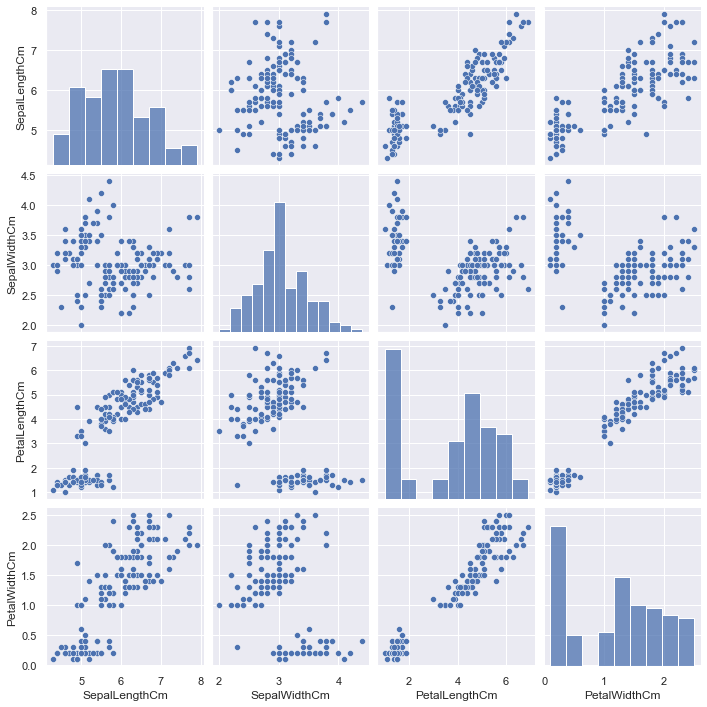

In [8]:
#Visualizing the dataset
sns.pairplot(iris)

The above is a pairplot of our iris dataset. The charts on the right diagonal are histograms showing column values and how much they occur. There is no presence of an outlier in the dataset. On careful observation, the scatterplot of petal width and petal length shows two distinguishable clusters (one cluster with higher petal sizes and another with lower petal sizes). The scatterplot of petal length and sepal width also shows two distinguishable clusters also. However, the scatterplot of sepal width and sepal length shows no distinguishable clusters.

## Data Preprocessing
    The Kmeans algorithm works based on distance, so we have to standardize our data to between values whose  mean is 0 and standard deviation is 1 to ensure that our algorithm works properly. We will use the Standard scaler class from the scikit-learn library to do this.

In [9]:
ss=StandardScaler()                    #Instantiating the standard scaler class
iris_scaled= ss.fit_transform(iris)    #Fitting and transforming the dataset
iris_scaled

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

Now we create a function to calculate the optimal amount of clusters our model can differentiate. This is done by the means of an elbow curve plot.

In [10]:
def elbow_plot(n, df):
    # n is the maximum number of clusters you want
    # df is the dataset
    distortions= [ ]
    length= range(1, n)
    for i in length:
        kmeans= KMeans(n_clusters= i)
        kmeans.fit(df)
        distortions.append(kmeans.inertia_)
    plt.plot(length, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortions')
    plt.title('Elbow plot showing optimal no. of clusters')
    plt.show()

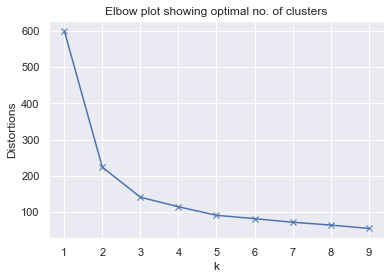

In [11]:
elbow_plot(10, iris_scaled)

To pick our maximum number of cluster, we need to find the value of k on the elbow that the distortions starts decreasing in a linear fashion. Thus the value of k is 3.

In [12]:
# Fitting our model awith the optimal number of clusters
kmeans_1= KMeans(n_clusters= 3)
kmeans_1.fit(iris_scaled)
clusters = kmeans_1.predict(iris_scaled)
iris['clusters']= clusters
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,clusters
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


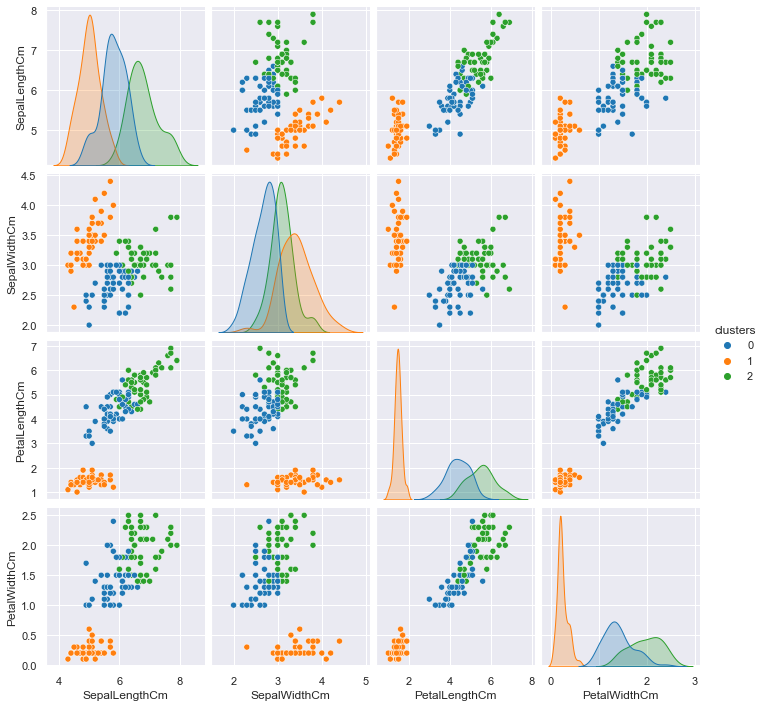

In [13]:
sns.pairplot(iris, hue= 'clusters', palette= 'tab10')

The above is a visualization of our data with the clusters added. There seems to be an overlap of features for the '0' class and '2' class. Class 1 tends to have smaller petal sizes(petal length and width) from the other clusters.

### This concludes the unsupervised learning task



## Thank You